### Approche

1. **Exploration des données**
   - Analyse de la distribution des variables.
   - Exploration des relations entre les variables explicatives et la variable cible (**Défaut**) à travers des statistiques descriptives (analyses univariées et bivariées).

2. **Prétraitement des données**
   - Traitement des valeurs manquantes.
   - Encodage des variables catégorielles.
   - Normalisation/standardisation des variables numériques.

3. **Fractionnement des données**
   - Séparation des données en ensembles d'entraînement et de test.
   - Utilisation de méthodes de rééchantillonnage, notamment le **StratifiedKFold**.

4. **Modélisation**
   - Algorithmes de machine learning appliqués :
     - Régression logistique.
     - Random Forest.

5. **Évaluation des modèles**
   - Mesures de performance :
     - **Recall**, **Précision**, **Exactitude**, **F1-score**.
     - **Matrice de confusion**, **AUC-ROC**.

6. **Interprétation des résultats**
   - Identification des variables clés influençant le risque de défaut de crédit.
   - Analyse des tendances et des insights issus des modèles.



In [ ]:
# Install the following librairies (it is better to create a venv (or conda) virtual environment first and install these librairies in it)
!pip install mlflow
!pip install --upgrade jinja2
!pip install --upgrade Flask
!pip install setuptools

In [ ]:
# starts an MLflow server locally.
!mlflow server --host 127.0.0.1 --port 8080

In [ ]:
from mlflow import MlflowClient
from pprint import pprint
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# In order to connect to the tracking server, we’ll need to use the uri that we assigned the server when we started it.

client = MlflowClient(tracking_uri="http://127.0.0.1:8080")

#it allows programmatic interaction with the MLflow tracking server.

In [ ]:
all_experiments = client.search_experiments()

print(all_experiments)

In [ ]:
import mlflow
from mlflow.tracking import MlflowClient

# Description: Ce script crée ou récupère une expérience MLflow pour un projet de régression logistique dans le secteur bancaire.
# L'expérience est enrichie avec des métadonnées pour faciliter la gestion et la recherche des runs.

# Initialiser un client MLflow pour interagir avec le serveur MLflow
mlflow_client = MlflowClient()

# Description de l'expérience pour l'affichage dans l'interface utilisateur de MLflow
description_text = (
    "Projet de prévision de risque de défaut sur prêts personnels utilisant des modèles de régression logistique. "
    "Cette expérience contient divers runs pour modéliser le comportement de remboursement."
)

# Métadonnées de l'expérience sous forme de tags pour une meilleure organisation
tags = {
    "project_name": "Risk_Default_Prediction",
    "department": "Retail_Banking",
    "team": "Risk_Management",
    "project_quarter": "Q4-2024",
    "mlflow.note.content": description_text  # Description détaillée
}

# Nom de l'expérience
experiment_name = "Risk_Default_Modeling"

# Vérifier si l'expérience existe déjà pour éviter de créer un doublon
try:
    existing_experiment = mlflow_client.get_experiment_by_name(experiment_name)
    if existing_experiment:
        experiment_id = existing_experiment.experiment_id
        print(f"Expérience existante utilisée, ID : {experiment_id}")
    else:
        # Créer une nouvelle expérience si elle n'existe pas
        experiment_id = mlflow_client.create_experiment(name=experiment_name, tags=tags)
        print(f"Nouvelle expérience créée avec l'ID : {experiment_id}")
except Exception as e:
    print(f"Erreur lors de la création ou récupération de l'expérience : {str(e)}")

# Définir l'expérience active pour tous les runs futurs dans cette session
mlflow.set_experiment(experiment_id=experiment_id)


In [ ]:
from mlflow.tracking import MlflowClient

# Initialiser un client MLflow pour interagir avec le serveur MLflow
mlflow_client = MlflowClient()

# Tag de projet pour la recherche
project_name_tag = "Risk_Default_Prediction"

# Rechercher une expérience MLflow en utilisant le tag `project_name`
search_results = mlflow_client.search_experiments(
    filter_string=f"tags.`project_name` = '{project_name_tag}'"
)

# Gérer le cas où aucune expérience n'est trouvée
if search_results:
    # Afficher les détails de la première expérience trouvée
    first_experiment = search_results[0]
    print(vars(first_experiment))
else:
    print("Aucune expérience trouvée correspondant au tag donné.")


#### Installation des packages nécessaires

In [1]:
# Manipulation des données 
import pandas as pd 
import numpy as np 

# Visualisation des données
import matplotlib.pyplot  as plt 
import plotly.express as px
import seaborn as sns 
import plotly.graph_objects as go

# Tests statistique(khi-deux)
from scipy.stats import chi2_contingency

# Gestion des message d'averstissement()
import warnings
warnings.filterwarnings("ignore")

# afficher des barres de progression  dans le notebooks Jupyter. 
from alive_progress import alive_bar
import time

# Afficher les version des lib 
import watermark

# Pour le preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import RandomUnderSampler

# Pour l'apprentissage
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold, cross_val_score, train_test_split

# Importer toutes les métriques pour l'évaluation
from sklearn.metrics import *   

# Feature importance
import shap

# Initialiser la bibliothèque JavaScript de SHAP
shap.initjs()


# afficher les versions des bibliothèques et des dépendances utilisées
%reload_ext watermark
%watermark -a "Library versions" --iversions


Author: Library versions

pandas    : 2.1.4
shap      : 0.46.0
sklearn   : 1.2.2
numpy     : 1.26.4
xgboost   : 2.1.1
seaborn   : 0.12.2
plotly    : 5.9.0
watermark : 2.4.3
matplotlib: 3.8.0



In [2]:
# Charger les données
df = pd.read_csv(r"C:\Users\carlène Tungamwese\OneDrive\Bureau\Nouveau dossier\FORMATION\Projet ML ops\Loan_Data.csv")

In [3]:
# Description des données:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


In [4]:
# Afficher toutes les colonnes du dataframe
pd.set_option('display.max_columns', None)

# Afficher un échantillon aléatoire de 5 individus
df.sample(5)

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
2593,1279403,0,3391.636224,4530.834015,62731.62667,5,572,0
2460,2088887,5,3411.916732,18131.927520,60719.62292,1,615,1
3689,1137246,0,3575.015601,3370.359931,62861.44838,5,586,0
2561,8160937,0,5950.489796,1176.600320,117660.03200,5,598,0
7879,8251307,0,3994.645830,4038.230709,85237.09390,4,580,0


In [5]:
# La dimension du dataframe 
print(f"\n Le dataset contient: {df.shape[0]} lignes et \n {df.shape[1]} colonnes")


 Le dataset contient: 10000 lignes et 
 8 colonnes


In [6]:
# Le type de données des variables 
print("\n Le type des différentes colonnes est: ")
df.dtypes


 Le type des différentes colonnes est: 


customer_id                   int64
credit_lines_outstanding      int64
loan_amt_outstanding        float64
total_debt_outstanding      float64
income                      float64
years_employed                int64
fico_score                    int64
default                       int64
dtype: object

In [7]:
# Convertir la colonne en type catégoriel
df['credit_lines_outstanding'] = df['credit_lines_outstanding'].astype('category')


In [8]:
# Transformer les type de variables
df.dtypes

customer_id                    int64
credit_lines_outstanding    category
loan_amt_outstanding         float64
total_debt_outstanding       float64
income                       float64
years_employed                 int64
fico_score                     int64
default                        int64
dtype: object

#### 2- Analyse exploratoire 

In [9]:
pd.options.display.float_format = '{:.2f}'.format
# Statistisques descriptives 
df.describe()

,customer_id,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,4974577.00,4159.68,8718.92,70039.90,4.55,637.56,0.19
std,2293889.71,1421.40,6627.16,20072.21,1.57,60.66,0.39
min,1000324.00,46.78,31.65,1000.00,0.00,408.00,0.00
25%,2977661.00,3154.24,4199.84,56539.87,3.00,597.00,0.00
50%,4989501.50,4052.38,6732.41,70085.83,5.00,638.00,0.00
75%,6967210.25,5052.90,11272.26,83429.17,6.00,679.00,0.00
max,8999789.00,10750.68,43688.78,148412.18,10.00,850.00,1.00


In [10]:
# Récherche de doublons via la variable "LoanID"

if df['customer_id'].nunique() < df.shape[0]:
    print(f"Le dataset contient {df.shape[0] - df['customer_id'].nunique()} doublons")
else:
    print("\n Le dataset ne contient pas de doublons")



 Le dataset ne contient pas de doublons


In [11]:
# Nous pouvons maintenant supprimer la colonne LoanID pour une meilleur organisation
df.drop(['customer_id'], axis=1, inplace=True)

In [12]:
CATEGORICALS = df.select_dtypes(include=['category']).columns
CATEGORICALS

Index(['credit_lines_outstanding'], dtype='object')

In [13]:
NUMERICS = df.select_dtypes(include=['int64', 'float64']).columns
NUMERICS

Index(['loan_amt_outstanding', 'total_debt_outstanding', 'income',
       'years_employed', 'fico_score', 'default'],
      dtype='object')

##### ANALYSE UNIVARIEE

In [14]:
# Distibution de la variable cible (Default de remboursement)
print("\nDistribution de la variable d'interêt:")
df['default'].value_counts(normalize=True)


Distribution de la variable d'interêt:


default
0   0.81
1   0.19
Name: proportion, dtype: float64

In [15]:
# Distibution des données Categorielles
for col in df.columns:
    if df[col].dtype == 'category':
        print(f"\n La distribution of: {col}\n")
        print(df[col].value_counts())




 La distribution of: credit_lines_outstanding

credit_lines_outstanding
0    4128
1    2590
5    1297
2     902
3     599
4     484
Name: count, dtype: int64


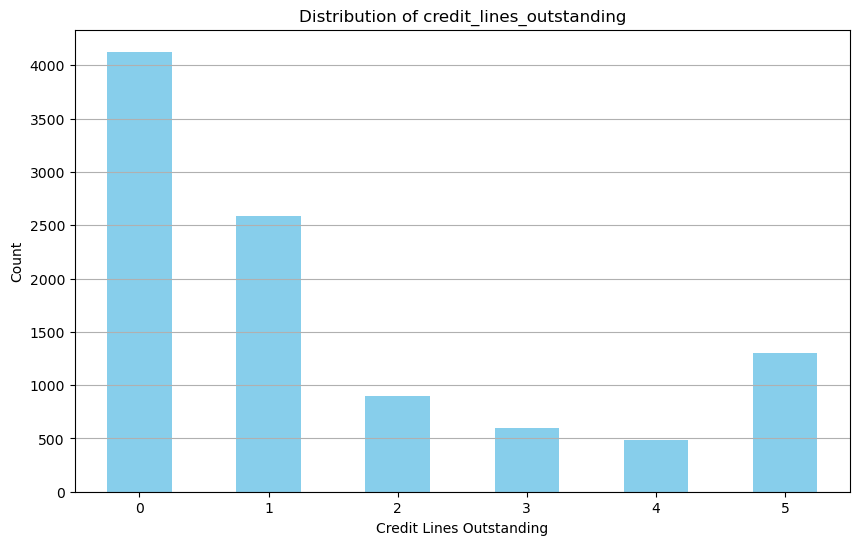

In [16]:
# Calculer la distribution des valeurs
distribution = df["credit_lines_outstanding"].value_counts().sort_index()

# Visualiser la distribution
plt.figure(figsize=(10, 6))
distribution.plot(kind='bar', color='skyblue')  # Utiliser la distribution calculée
plt.title('Distribution of credit_lines_outstanding')
plt.xlabel('Credit Lines Outstanding')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()



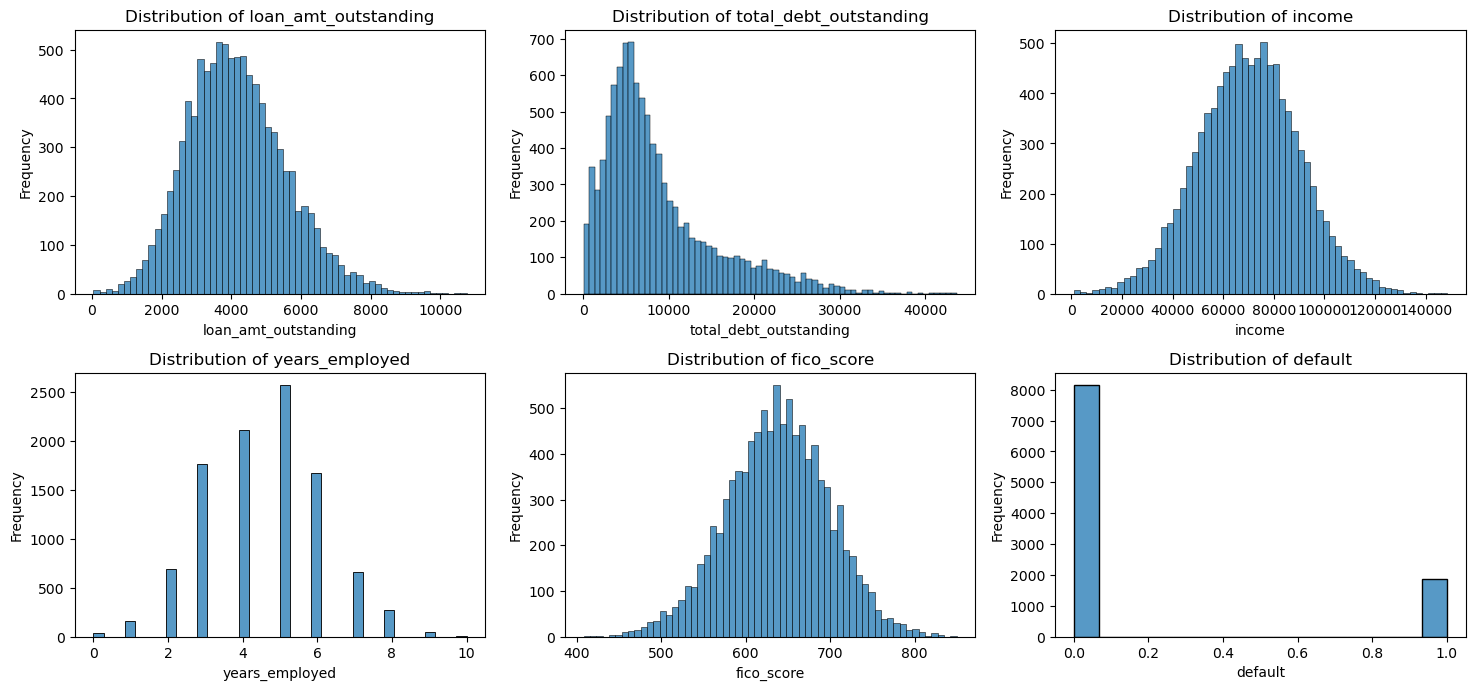

In [17]:
# Garphique de Distribution des variables numeriques
plt.figure(figsize=(15, 10))
for i, col in enumerate(NUMERICS):
    plt.subplot(len(NUMERICS) // 3 + 1, 3, i + 1)
    sns.histplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()


#### ANALYSE BIVARIEE

In [18]:
# Création de tableaux croisés entre notre variable cible et les variables catégorielles
for var in CATEGORICALS:
    table = pd.crosstab(index=df[var], columns=df['default'], margins=False)

    # Renommer les colonnes 
    table.rename(columns={1: 'Effectif_Default', 0: 'Effectif_Non_Default'}, inplace=True)
    
    # Calcul du total et du taux de défaut
    table['Effectif_Total'] = table['Effectif_Default'] + table['Effectif_Non_Default']
    table['Taux_Default (%)'] = (table['Effectif_Default'] / table['Effectif_Total'] * 100).round(3)

    # Réorganisation du tableau (sans la colonne Effectif_Non_Default)
    table = table[['Effectif_Total', 'Effectif_Default', 'Taux_Default (%)']]
    
    print(f"\nTableau de contingence entre '{var}' et 'Default' de remboursement :\n")
    print(table)



Tableau de contingence entre 'credit_lines_outstanding' et 'Default' de remboursement :

default                   Effectif_Total  Effectif_Default  Taux_Default (%)
credit_lines_outstanding                                                    
0                                   4128                 0              0.00
1                                   2590                 0              0.00
2                                    902                 7              0.78
3                                    599               137             22.87
4                                    484               412             85.12
5                                   1297              1295             99.85


In [19]:

# Nom de la variable catégorielle à tester
variable_categorielle = 'credit_lines_outstanding'  # Remplacez par le nom de votre variable

# Création du tableau croisé
table = pd.crosstab(df[variable_categorielle], df['default'])

# Test du chi-carré
stat, p, dof, expected = chi2_contingency(table)
significant = p < 0.05  # Significativité: (p < 0.05)

# Résultats du test
results = {
    'Variable': variable_categorielle,
    'Chi_square_statistic': stat,
    'Degrees_of_freedom': dof,
    'P_value': p,
    'Significant': '***' if significant else ''
}

summary_table = pd.DataFrame([results])

# Affichage du tableau récapitulatif en format Markdown 
try:
    import tabulate
    print(summary_table.to_markdown(index=False))
except ImportError:
    print("""La bibliothèque 'tabulate' n'est pas installée. 
          Affichage du tableau sans formatage Markdown.""")
    print(summary_table)

print("\n *** : Significatif au seuil 5% ")


| Variable                 |   Chi_square_statistic |   Degrees_of_freedom |   P_value | Significant   |
|:-------------------------|-----------------------:|---------------------:|----------:|:--------------|
| credit_lines_outstanding |                8833.86 |                    5 |         0 | ***           |

 *** : Significatif au seuil 5% 


In [20]:
# Supprimer la Target 'Default' dans la liste des Features numercis
NUMERICS = [col for col in NUMERICS if col != 'default']
print("\nLes variables numériques:")
NUMERICS


Les variables numériques:


['loan_amt_outstanding',
 'total_debt_outstanding',
 'income',
 'years_employed',
 'fico_score']

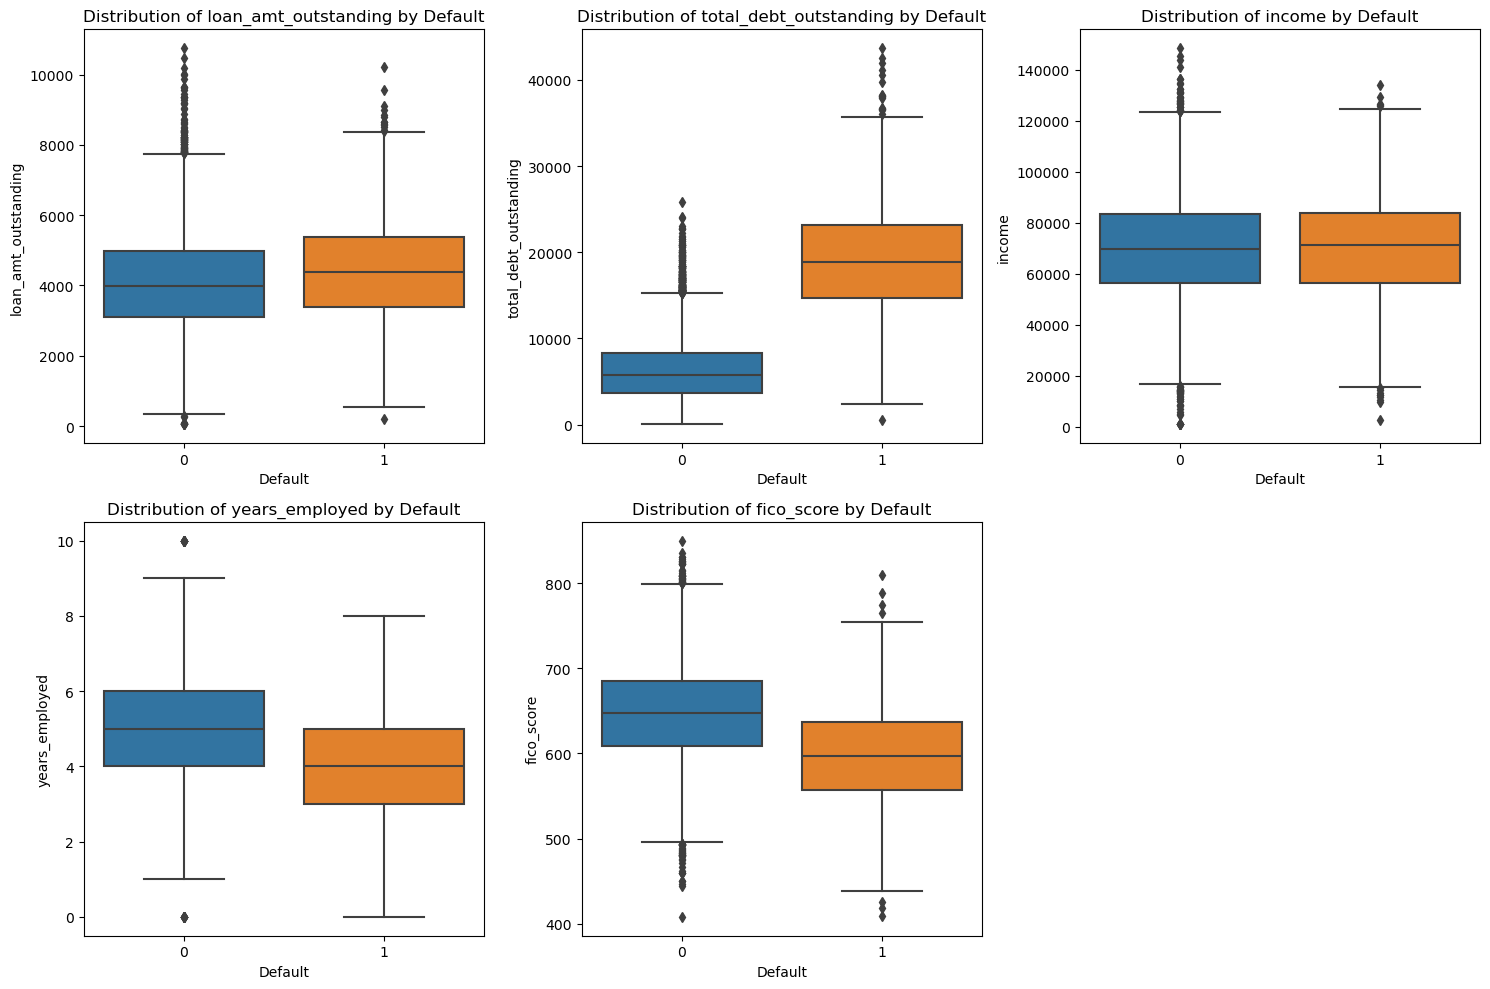


 0: Pas de Defaut de remboursement
 1: Defaut de remboursement


In [21]:
# Rélation entre Default(Defaut de rembourssemnt) et explicatives continue: Boxplot

plt.figure(figsize=(15, 10))
for i, col in enumerate(NUMERICS):
    plt.subplot(len(NUMERICS) // 3 + 1, 3, i + 1)
    sns.boxplot(data=df, x='default', y=col)
    plt.title(f'Distribution of {col} by Default')
    plt.xlabel('Default')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

print("\n 0: Pas de Defaut de remboursement\n 1: Defaut de remboursement")


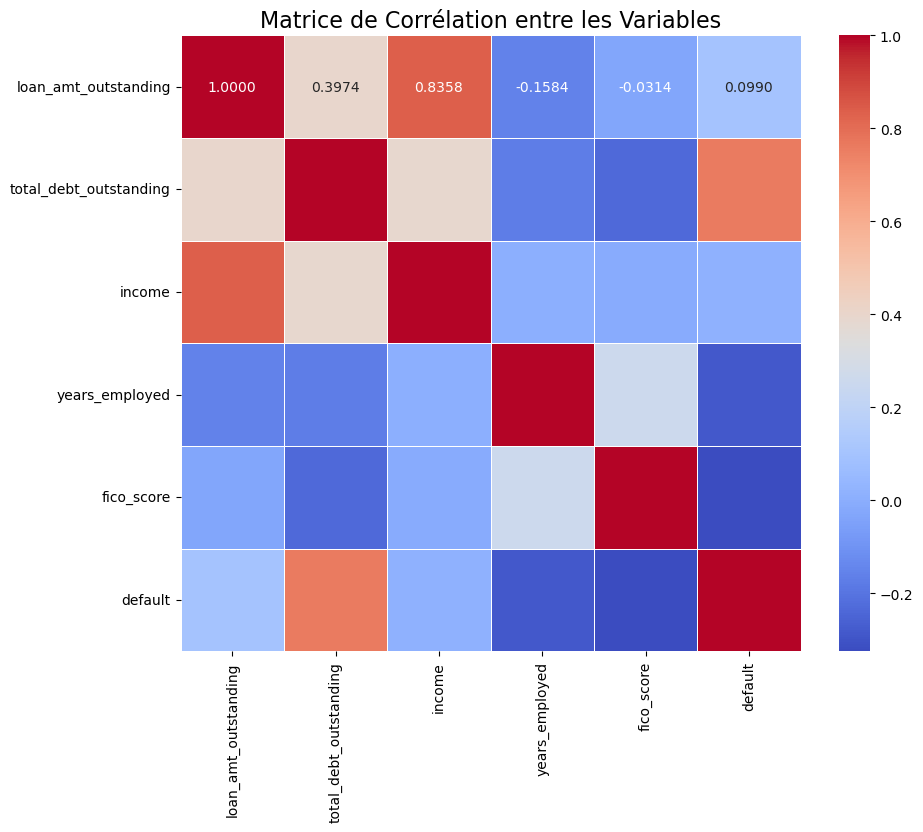

In [22]:
# la matrice de corrélation: Rélation entre 'default' et explicatives  continues: 
# Permet de soupçonnner un un problème d'endogenéité
correlation_matrix = df[NUMERICS + ['default']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', fmt=".4f", linewidths=0.5)
plt.title('Matrice de Corrélation entre les Variables', fontsize=16)
plt.show()

#### Prétraitement des données

In [23]:
# Verification des NA par colonne
df.isnull().sum()

credit_lines_outstanding    0
loan_amt_outstanding        0
total_debt_outstanding      0
income                      0
years_employed              0
fico_score                  0
default                     0
dtype: int64

##### Régrouper les variables en Features (X) et cible(y=Default) 

In [24]:

CATEGORICALS= list(CATEGORICALS)
X = df[NUMERICS + CATEGORICALS]
y = df['default']

In [25]:
# Les colonnes des FEATURES
X.columns

Index(['loan_amt_outstanding', 'total_debt_outstanding', 'income',
       'years_employed', 'fico_score', 'credit_lines_outstanding'],
      dtype='object')

In [26]:
# Diviser les données en ensembles d'entraînement et de test avec train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Variables numériques
NUMERICS = X_train.select_dtypes(include=['float64','int64']).columns.tolist()  

# Colonnes catégorielles
CATEGORICALS = X_train.select_dtypes(include=['category']).columns.tolist() 

In [28]:
# Normalisation des variables quantitatives et encodage des variables qualitatives

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, NUMERICS),
        ('cat', categorical_transformer, CATEGORICALS)
    ])

In [29]:
# Appliquer la pipline de traitement au données 
X_train_preprocessed = preprocessor.fit_transform(X_train)

X_test_preprocessed = preprocessor.transform(X_test)

#### ENTRAINEMENT DES MODELES 

#### MODELES: Régression Logistique, Random Forest (avec validation croisée)

#### Régression Logistique 

In [30]:
print("Colonnes dans X_train :", X_train.columns)
print("Colonnes dans X_test :", X_test.columns)

Colonnes dans X_train : Index(['loan_amt_outstanding', 'total_debt_outstanding', 'income',
       'years_employed', 'fico_score', 'credit_lines_outstanding'],
      dtype='object')
Colonnes dans X_test : Index(['loan_amt_outstanding', 'total_debt_outstanding', 'income',
       'years_employed', 'fico_score', 'credit_lines_outstanding'],
      dtype='object')


In [31]:
# Normalisation des variables quantitatives et encodage des variables qualitatives
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, NUMERICS),
        ('cat', categorical_transformer, CATEGORICALS)
    ])

In [32]:
# Appliquer la pipeline de traitement aux données 
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [33]:
# ---- Modèle 1 : Régression Logistique 
logistic_model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced', penalty='l1', solver='liblinear')

# Liste des scores de prédiction
logistic_recall_scores = []
logistic_y_pred_all = []  # stocker les prédictions de la LR

n_splits = 5
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lancer la CV
with alive_bar(n_splits, title="Évaluation du modèle Régression Logistique", force_tty=True) as bar:
    for fold_index, (train_index, test_index) in enumerate(kf.split(X_train, y_train), 1):
        X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        # Prétraiter les données
        X_train_fold_preprocessed = preprocessor.fit_transform(X_train_fold)
        X_test_fold_preprocessed = preprocessor.transform(X_test_fold)

        # Entraîner le modèle 
        logistic_model.fit(X_train_fold_preprocessed, y_train_fold)
        logistic_y_pred_fold = logistic_model.predict(X_test_fold_preprocessed)

        # Ajouter les vraies étiquettes et les prédictions
        logistic_y_pred_all.extend(logistic_y_pred_fold)

        # Calcul du rappel
        logistic_recall = recall_score(y_test_fold, logistic_y_pred_fold)
        logistic_recall_scores.append(logistic_recall)

        # Afficher les informations du pli et le rapport de classification
        print(f"\n-------------------- Pli {fold_index} -----------------")
        print(f"--- Taille d'Entraînement : {len(y_train_fold)}, Taille de Test : {len(y_test_fold)} ---")
        print("\nRégression Logistique :\n")
        print(classification_report(y_test_fold, logistic_y_pred_fold))

        bar()
        time.sleep(0.005)

# Calculer et afficher le rappel moyen 
mean_logistic_recall = np.mean(logistic_recall_scores)
print(f"\nLe rappel moyen pour la Régression Logistique sur {n_splits} plis est : {mean_logistic_recall:.3f}")

# Évaluation finale sur l'ensemble de test non utilisé dans la validation croisée
logistic_y_test_pred = logistic_model.predict(preprocessor.transform(X_test))

# rapport de classification final 
print("\nRapport de classification final pour la Régression Logistique :\n")
print(classification_report(y_test, logistic_y_test_pred))


on 0:                                                                           
      -------------------- Pli 1 -----------------
on 0: --- Taille d'Entraînement : 6400, Taille de Test : 1600 ---               
on 0:                                                                           
      Régression Logistique :
on 0:               precision    recall  f1-score   support                     
      
                 0       1.00      0.99      1.00      1300
                 1       0.98      1.00      0.99       300
      
          accuracy                           1.00      1600
         macro avg       0.99      1.00      0.99      1600
      weighted avg       1.00      1.00      1.00      1600
on 1:                                                                           
      -------------------- Pli 2 -----------------
on 1: --- Taille d'Entraînement : 6400, Taille de Test : 1600 ---               
on 1:                                                               

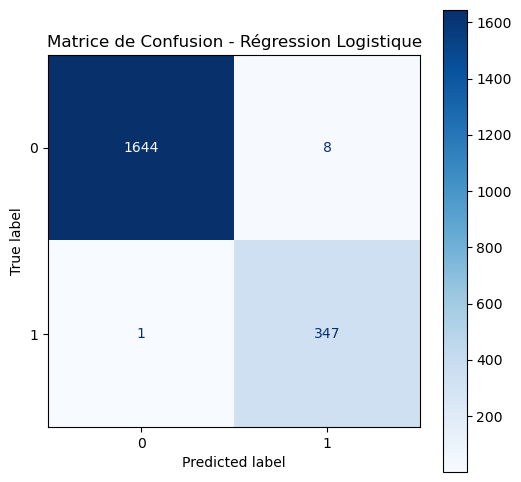

In [34]:
# Matrice de confusion pour le modèle de Régression Logistique
logistic_cm = confusion_matrix(y_test, logistic_y_test_pred)

# Affichage de la matrice de confusion
fig, ax = plt.subplots(figsize=(6, 6))  # Créer un axe unique pour la matrice de confusion
ConfusionMatrixDisplay(logistic_cm).plot(ax=ax, cmap='Blues')
ax.set_title('Matrice de Confusion - Régression Logistique')  # Ajouter un titre
plt.show()

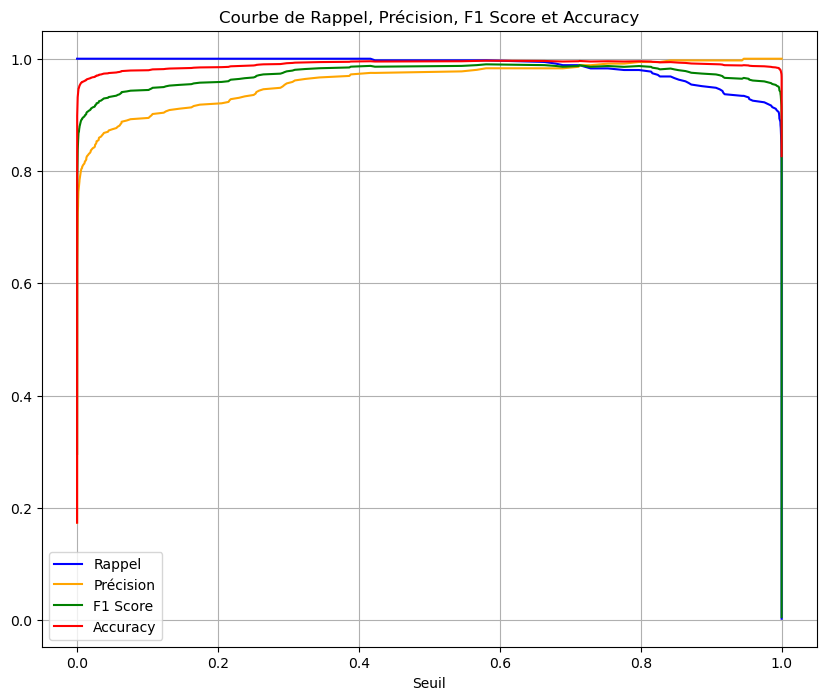

In [35]:
from sklearn.metrics import f1_score, accuracy_score

# Obtenir les probabilités de prédiction
logistic_y_proba = logistic_model.predict_proba(preprocessor.transform(X_test))[:, 1]

# Calculer la courbe de précision, rappel et seuils
precision, recall, thresholds = precision_recall_curve(y_test, logistic_y_proba)

# Calculer le F1 score et l'accuracy pour chaque seuil
f1_scores = [f1_score(y_test, logistic_y_proba >= t) for t in thresholds]
accuracies = [accuracy_score(y_test, logistic_y_proba >= t) for t in thresholds]

# Tracer la courbe de précision-rappel et les scores F1 et accuracy
plt.figure(figsize=(10, 8))
plt.plot(thresholds, recall[:-1], label='Rappel', color='blue')
plt.plot(thresholds, precision[:-1], label='Précision', color='orange')
plt.plot(thresholds, f1_scores, label='F1 Score', color='green')
plt.plot(thresholds, accuracies, label='Accuracy', color='red')
plt.xlabel('Seuil')
plt.title('Courbe de Rappel, Précision, F1 Score et Accuracy')
plt.legend()
plt.grid()
plt.show()

In [36]:
# Extraction des coefficients et des noms des features
logistic_coefficients = logistic_model.coef_[0]
feature_names = preprocessor.get_feature_names_out()  # Obtenir les noms des features

# Créer un DataFrame pour les coefficients
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': logistic_coefficients
})

# Calculer la valeur absolue des coefficients pour l'importance
importance_df['Absolute_Coefficient'] = importance_df['Coefficient'].abs()

# Seuil de significativité des coefficients (0.05)
significant_threshold = 0.05

# Filtrer les coefficients significatifs
significant_importance_df = importance_df[importance_df['Absolute_Coefficient'] > significant_threshold]

# Trier par importance absolue
significant_importance_df = significant_importance_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Calculer la somme des coefficients significatifs
sum_significant_abs_coefficients = significant_importance_df['Absolute_Coefficient'].sum()

# Créer un score basé sur les coefficients significatifs (en pourcentage)
significant_importance_df['Score'] = (significant_importance_df['Absolute_Coefficient'] / sum_significant_abs_coefficients) * 100

# Afficher les résultats
print("Les variables significatives avec leurs scores :")
print(significant_importance_df[['Feature', 'Coefficient', 'Score']])

# Couleurs pour le graphique
significant_importance_df['Color'] = significant_importance_df['Score'].apply(lambda x: 'green' if x > 0 else 'red')

# Visualisation
fig = px.bar(
    significant_importance_df,
    x='Score',
    y='Feature',
    color='Color',
    color_discrete_map={'green': 'green', 'red': 'red'},
    title='Scores des Variables Significatives - Régression Logistique',
    labels={'Score': 'Score (%)', 'Feature': 'Variable'}
)

# Ajouter une ligne verticale pour le score zéro
fig.add_shape(type="line", x0=0, x1=0, y0=-1, y1=len(significant_importance_df)-1, line=dict(color="grey", width=2, dash="dash"))
fig.show()

Les variables significatives avec leurs scores :
                            Feature  Coefficient  Score
10  cat__credit_lines_outstanding_5        14.28  23.28
6   cat__credit_lines_outstanding_1        -9.37  15.27
9   cat__credit_lines_outstanding_4         7.67  12.50
7   cat__credit_lines_outstanding_2        -7.64  12.45
1       num__total_debt_outstanding         6.78  11.05
5   cat__credit_lines_outstanding_0        -5.01   8.16
2                       num__income        -4.39   7.15
3               num__years_employed        -4.10   6.68
4                   num__fico_score        -1.78   2.90
0         num__loan_amt_outstanding         0.35   0.57


In [37]:
# ---- Modèle 2 : Random Forest ----
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, classification_report
import numpy as np
import time
from alive_progress import alive_bar
from sklearn.model_selection import KFold

# Initialisation du modèle Random Forest avec des paramètres ajustables
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Liste pour les scores de rappel
rf_recall_scores = []
rf_y_pred_all = []  # Pour stocker les prédictions du modèle Random Forest

# Appliquer la validation croisée sur le modèle Random Forest
with alive_bar(n_splits, title="Évaluation du modèle Random Forest", force_tty=True) as bar:
    for fold_index, (train_index, test_index) in enumerate(kf.split(X_train, y_train), 1):
        X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        # Prétraiter les données
        X_train_fold_preprocessed = preprocessor.fit_transform(X_train_fold)
        X_test_fold_preprocessed = preprocessor.transform(X_test_fold)

        # Entraîner le modèle Random Forest
        rf_model.fit(X_train_fold_preprocessed, y_train_fold)
        rf_y_pred_fold = rf_model.predict(X_test_fold_preprocessed)

        # Ajouter les vraies étiquettes et les prédictions
        rf_y_pred_all.extend(rf_y_pred_fold)

        # Calculer le score de rappel pour chaque pli
        rf_recall = recall_score(y_test_fold, rf_y_pred_fold)
        rf_recall_scores.append(rf_recall)

        # Afficher les informations du pli et le rapport de classification
        print(f"\n-------------------- Pli {fold_index} -----------------")
        print(f"--- Taille d'Entraînement : {len(y_train_fold)}, Taille de Test : {len(y_test_fold)} ---")
        print("\nRandom Forest :\n")
        print(classification_report(y_test_fold, rf_y_pred_fold))
        
        bar()
        time.sleep(0.005)

# Calculer et afficher le rappel moyen pour le modèle
mean_rf_recall = np.mean(rf_recall_scores)
print(f"\nLe rappel moyen pour Random Forest sur {n_splits} plis est : {mean_rf_recall:.3f}")

# Évaluation finale sur l'ensemble de test non utilisé dans la validation croisée
X_test_preprocessed = preprocessor.transform(X_test)  # Prétraiter les données de test
rf_y_test_pred = rf_model.predict(X_test_preprocessed)  # Prédictions sur l'ensemble de test

# Rapport de classification final
print("\nRapport de classification final pour Random Forest :\n")
print(classification_report(y_test, rf_y_test_pred))


on 0:                                                                           
      -------------------- Pli 1 -----------------
on 0: --- Taille d'Entraînement : 6400, Taille de Test : 1600 ---               
on 0:                                                                           
      Random Forest :
on 0:               precision    recall  f1-score   support                     
      
                 0       1.00      1.00      1.00      1300
                 1       0.99      0.99      0.99       300
      
          accuracy                           1.00      1600
         macro avg       0.99      0.99      0.99      1600
      weighted avg       1.00      1.00      1.00      1600
on 1:                                                                           
      -------------------- Pli 2 -----------------
on 1: --- Taille d'Entraînement : 6400, Taille de Test : 1600 ---               
on 1:                                                                       

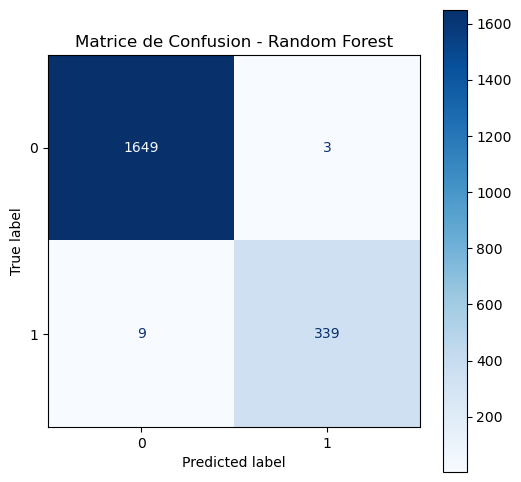

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Matrice de confusion pour le modèle Random Forest
rf_cm = confusion_matrix(y_test, rf_y_test_pred)

# Affichage de la matrice de confusion
fig, ax = plt.subplots(figsize=(6, 6))  # Créer un axe unique pour la matrice de confusion

# Matrice de confusion Random Forest
ConfusionMatrixDisplay(rf_cm).plot(ax=ax, cmap='Blues')
ax.set_title('Matrice de Confusion - Random Forest')  # Ajouter un titre

plt.show()

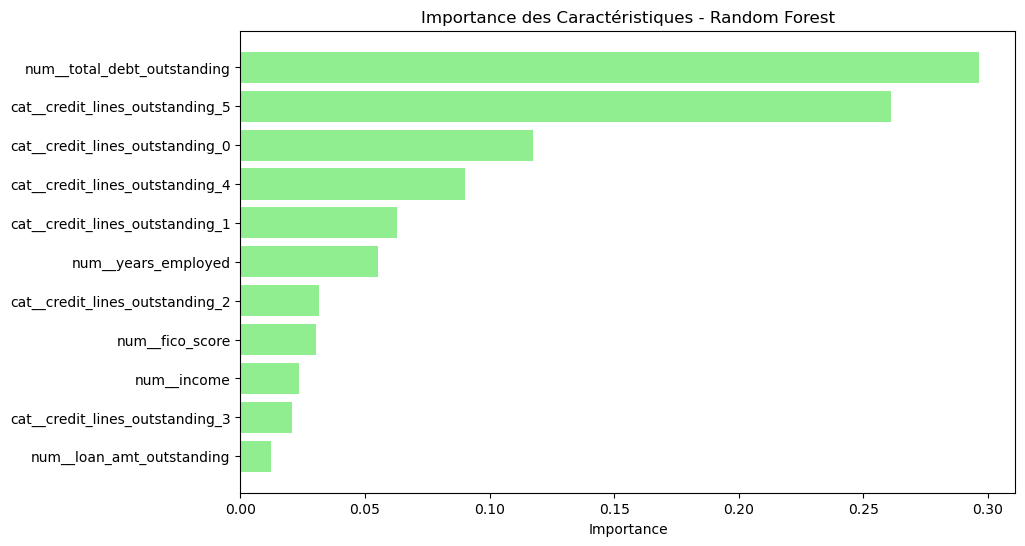

In [40]:
# ---- Importance des caractéristiques pour Random Forest ----
# Extraire les importances
feature_importances = rf_model.feature_importances_

# Créer un DataFrame pour les importances
importance_df = pd.DataFrame({
    'Feature': preprocessor.get_feature_names_out(),  # Assurez-vous que le préprocesseur est compatible avec cette méthode
    'Importance': feature_importances
})

# Trier par importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualiser l'importance des caractéristiques
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='lightgreen')  # Changé la couleur pour différencier de XGBoost
plt.xlabel('Importance')
plt.title('Importance des Caractéristiques - Random Forest')
plt.gca().invert_yaxis()  # Inverser l'axe y pour afficher la plus importante en haut
plt.show()


### Modèle final: Régression Logistique

In [ ]:
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Définir l'URI de suivi MLflow pour pointer vers votre serveur local MLflow
mlflow.set_tracking_uri("http://127.0.0.1:8080")

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Définir les paramètres pour la régression logistique
params = {
    "penalty": "l1",
    "solver": "liblinear",  # 'liblinear' est compatible avec 'l1'
    "class_weight": "balanced",
    "max_iter": 1000,
    "random_state": 42,
}

# Entraîner le modèle de régression logistique
logistic_model = LogisticRegression(**params)
logistic_model.fit(X_train, y_train)

# Prédire sur le set de validation
y_pred = logistic_model.predict(X_val)

# Calculer les métriques de performance
metrics = {
    "accuracy": accuracy_score(y_val, y_pred),
    "precision": precision_score(y_val, y_pred, average='binary'),
    "recall": recall_score(y_val, y_pred, average='binary'),
    "f1_score": f1_score(y_val, y_pred, average='binary'),
}

# Lancer le contexte MLflow pour suivre le modèle et ses résultats
with mlflow.start_run(run_name="Logistic_Regression_Model"):
    # Log des paramètres utilisés pour l'entraînement
    mlflow.log_params(params)

    # Log des métriques calculées
    mlflow.log_metrics(metrics)

    # Log du modèle entraîné pour une utilisation future
    mlflow.sklearn.log_model(
        sk_model=logistic_model,
        artifact_path="logistic_regression_model",
        registered_model_name="LogisticRegressionModel"
    )


In [ ]:
import pickle
import mlflow
import mlflow.sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Configuration de MLflow
mlflow.set_experiment("Logistic_Regression_Experiment")  # Assurez-vous que l'expérience existe ou sera créée

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Définir les paramètres pour la régression logistique
params = {
    "penalty": "l1",
    "solver": "liblinear",  # 'liblinear' est compatible avec 'l1'
    "class_weight": "balanced",
    "max_iter": 1000,
    "random_state": 42,
}

# Entraîner le modèle de régression logistique
logistic_model = LogisticRegression(**params)
logistic_model.fit(X_train, y_train)

# Prédire sur le set de validation
y_pred = logistic_model.predict(X_val)

# Calculer les métriques de performance
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='binary')
recall = recall_score(y_val, y_pred, average='binary')
f1 = f1_score(y_val, y_pred, average='binary')

# Regrouper les métriques dans un dictionnaire
metrics = {
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
    "f1_score": f1,
}

# ---- Enregistrement du modèle avec Pickle ----
model_path = "logistic_model.pkl"
with open(model_path, 'wb') as file:
    pickle.dump(logistic_model, file)

print(f"Modèle enregistré sous {model_path}")

# ---- Suivi avec MLflow ----
with mlflow.start_run(run_name="Logistic_Regression_Model") as run:
    # Log des paramètres utilisés pour l'entraînement
    mlflow.log_params(params)

    # Log des métriques calculées
    mlflow.log_metrics(metrics)

    # Enregistrement du modèle avec MLflow
    mlflow.sklearn.log_model(logistic_model, "logistic_model")  # Utilisation de l'intégration MLflow pour sklearn

    # Log du fichier modèle Pickle comme artefact
    mlflow.log_artifact(model_path)

print(f"Run details: {mlflow.get_run(run.info.run_id)}")
